In [152]:
import numpy as np
import matplotlib.pyplot as plt
#import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['text.usetex'] = True

In [153]:
#parametros
a = 10
b = 2.666667 #8/3
r = 28

f1 = lambda x,y: -a*x + a*y
f2 = lambda x,y,z: r*x - y - x*z
f3 = lambda x,y,z: -b*z + x*y

In [154]:
def Lorenz_RK4(x0,y0,z0,tmax,dt):
    n_pasos = int(tmax/dt)-1
    # vectores solucion
    x = np.zeros(n_pasos)
    y = np.zeros(n_pasos) 
    z = np.zeros(n_pasos) 
    t = np.zeros(n_pasos)
    
    x[0] = x0
    y[0] = y0
    z[0] = z0
    
    h = dt
    
    for i in range(n_pasos-1):
        k1 = f1(x[i],y[i])
        l1 = f2(x[i],y[i],z[i])
        m1 = f3(x[i],y[i],z[i])
        k2 = f1(x[i]+0.5*k1*h,y[i]+0.5*h*l1)
        l2 = f2(x[i]+0.5*k1*h,y[i]+0.5*h*l1,z[i]+0.5*h*m1)
        m2 = f3(x[i]+0.5*k1*h,y[i]+0.5*h*l1,z[i]+0.5*h*m1)
        k3 = f1(x[i]+0.5*k2*h,y[i]+0.5*h*l2)
        l3 = f2(x[i]+0.5*k2*h,y[i]+0.5*h*l2,z[i]+0.5*h*m2)
        m3 = f3(x[i]+0.5*k2*h,y[i]+0.5*h*l2,z[i]+0.5*h*m2)
        k4 = f1(x[i]+k3*h,y[i]+h*l3)
        l4 = f2(x[i]+k3*h,y[i]+h*l3,z[i]+h*m3)
        m4 = f3(x[i]+k3*h,y[i]+h*l3,z[i]+h*m3)
        #print(m1)
        
        t[i+1] = t[i] + h
        x[i+1] = x[i] + (h/6)*(k1 + 2.0*k2 + 2.0*k3 + k4)
        y[i+1] = y[i] + (h/6)*(l1 + 2.0*l2 + 2.0*l3 + l4)
        z[i+1] = z[i] + (h/6)*(m1 + 2.0*m2 + 2.0*m3 + m4)
    
    return t,x,y,z

In [155]:
t,x,y,z = Lorenz_RK4(5.0,5.0,5.0,20,0.01) #0.03125
t1,x1,y1,z1 = Lorenz_RK4(5.001,5.0,5.0,20,0.01) #0.03125

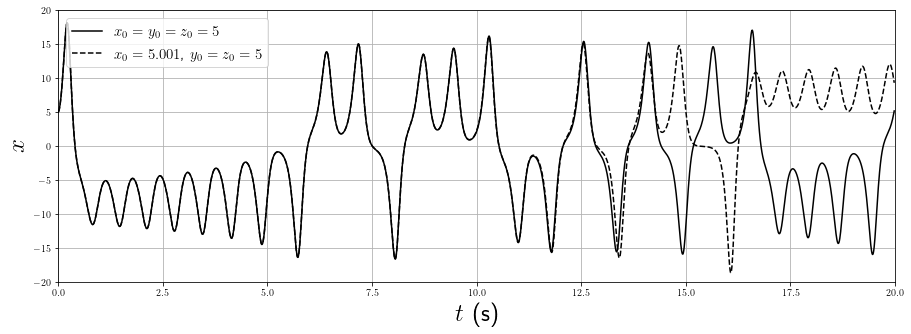

In [166]:
fig, ax0 = plt.subplots(figsize=(15,5))
ax0.plot(t,x,'-k',label='$x_{0}=y_{0}=z_{0}=5$')
ax0.plot(t1,x1,'--k',label='$x_{0}=5.001$, $y_{0}=z_{0}=5$')
ax0.set_xlim(0,tmax)
ax0.set_ylim(-20,20)
ax0.set_xlabel('$t$ (s)',fontsize=25)
ax0.set_ylabel('$x$',fontsize=25)
ax0.legend(fontsize=15)
ax0.grid()

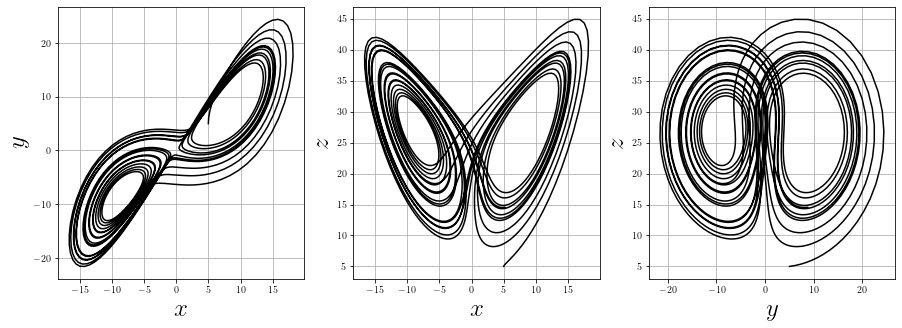

In [157]:
fig, ax = plt.subplots(1, 3,figsize=(15,5))
ax[0].plot(x,y,'-k')
ax[0].set_xlabel('$x$',fontsize=25)
ax[0].set_ylabel('$y$',fontsize=25)
ax[0].grid()
ax[1].plot(x,z,'-k')
ax[1].set_xlabel('$x$',fontsize=25)
ax[1].set_ylabel('$z$',fontsize=25)
ax[1].grid()
ax[2].plot(y,z,'-k')
ax[2].set_xlabel('$y$',fontsize=25)
ax[2].set_ylabel('$z$',fontsize=25)
ax[2].grid()

Text(0.5, 0, '$z$')

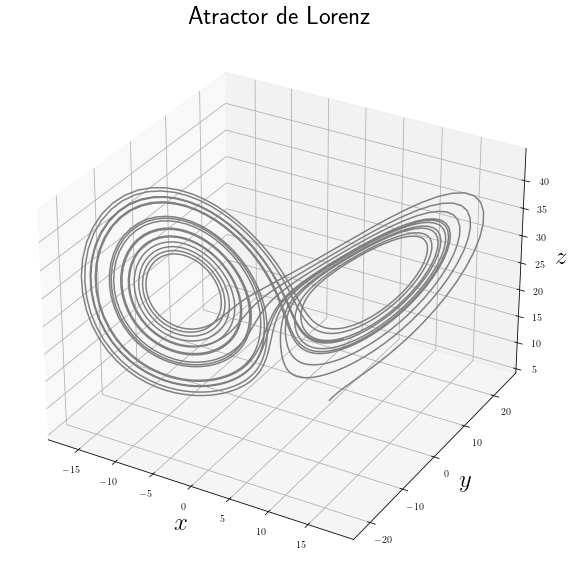

In [158]:
fig = plt.figure(figsize=(10,10))
ax  = plt.axes(projection='3d')

ax.plot3D(x, y, z, 'gray')
ax.set_title('Atractor de Lorenz',fontsize=25)
ax.set_xlabel('$x$',fontsize=25)
ax.set_ylabel('$y$',fontsize=25)
ax.set_zlabel('$z$',fontsize=25)